In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

**Summations**.  We did summations earlier, but say we have a list of $x$ values, and we want to perform the summation:
$$S = \sum_i x_i \cos(\pi x_i)$$
We can do this summation with a ``for loop``:

In [3]:
x_values = np.array([0, 1, 2, 3, 4, 5])
Summation_value = 0
for i in range(len(x_values)):
    Summation_value = Summation_value + x_values[i] * np.cos(np.pi * x_values[i])
print(Summation_value)

-3.0


In the above,
- The first line sets up a list of numbers, ``x_values`` that will be summed over
- The initialization line, ``Summation_value = 0``, just sets up the summation
- The ``for`` loop combined with ``Summation_value = Summation_value + ...`` will cycle through the different ``x_values`` and successively add the terms in the series.
- Finally the print statement is needed to report the result.

Let's try it with a brief example.  If:

In [4]:
new_x_values = np.array([1, 3, 5, 7, 9])

Write code that calculates $S = \sum_i x_i$, using the ``new_x_values`` array to perform the summation.  Your code should perform the summation using:
- the initialization of a variable, 
- using a ``for`` loop to do the summation, and
- print the result and confirm that it is 25

In [6]:
sum_value = 0

for i in range(len(new_x_values)):
    sum_value = sum_value + new_x_values[i]

print(sum_value)

25


# $\chi^2$-fitting

``fitteia`` and other ways of using data to infer physical information will typically use $\chi^2$ fitting when you have data with error bars.  The crux of the method is as follows:  when creating a best-fit curve, data points with small error bars are well known, so the best-fit curve should be closest to those, and data points with larger error bars are less-well-known, so the best-fit curve can be further away from these.

To do so, we create a statistic called $\chi^2$:
$$\chi^2 = \sum_i \frac{(y_i - f (x_i))^2}{\sigma_i^2}$$
In this formula, we assume our data gives us three lists of numbers:
- The $x_i$ are the ``independent_variables[i]``.
- The $y_i$ are the ``data[i]``.
- The $\sigma_i$ are the ``uncertainties[i]``.

$f (x_i)$ is a model that we're trying to find the best fit values for.

The summation means to calculate the fraction for each individual ``i``, and add up the contribution.  We note that if the data are very close to the model, $\chi^2$ is small, otherwise it can be big.  

**First,** let's load some data and make a graph.  Download ``Lab7Data.csv`` from Blackboard, and put it in the same folder as this lab (just like when you uploaded the lab into the home page of jupyter notebook).  Then:

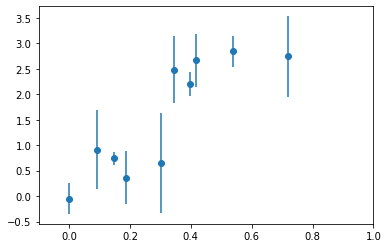

In [7]:
independent_variables, data, uncertainties = np.loadtxt('Lab7Data.csv',delimiter=',',usecols=(0,1,2),unpack=True)
plt.figure()
plt.errorbar(independent_variables, data, yerr = uncertainties, fmt='o')
plt.xlim(-0.1,1)
plt.show()

In the code,
- ``np.loadtxt()`` takes the data into the three arrays described above.
- ``plt.errorbar( )`` creates the error bar plot:
    - The first term is the x-axis
    - The second term is the y-axis
    - The ``yerr = uncertainties`` uses the array of uncertainties corresponding to the x and y values.
    - ``fmt = 'o'`` creates a dot at the data point, with the error bars above and below

It looks like a line can be drawn through these data points and their error bars, so let's choose our model to be $f (x) = m x$.  The slope, $m$, is something that we want to find the slope that best fits the data.

Since we want to find the best value of $m$, we should create a function.
In this function, you should use the arrays: ``independent_variables``, ``data``, and ``uncertainties`` as $x_i$, $y_i$, $\sigma_i$, respectively, to calculate:
$$\chi^2 (m) = \sum_i \frac{(y_i - m x_i)^2}{\sigma_i^2}$$
Write a function, ``chi_squared()`` to calculate $\chi^2 (m)$, with inputs:
- ``m``, the slope in our model
- ``x``, the independent variables array
- ``y`` the data array
- ``sigma`` the uncertainties array

Your function should then calculate the value of $\chi^2$ with the input value of $m$, then ``return`` the result.

In [12]:
x, y, sigma = np.loadtxt('Lab7Data.csv',delimiter=',',usecols=(0,1,2),unpack=True)

def chi_squared(m):
    chi = 0
    for i in range(len(x)):
        chi = chi + ((y[i]-m*x[i])**2)/(sigma[i]**2)
    return chi


Test your result by noting that when $m = 5$, that $\chi^2 = 7.12$, so when we call ``chi_squared(5, independent_variables, data, uncertainties)``, your code should return 7.12.

In [13]:
chi_squared(5)

7.121226916242717

To find the "best fit slope," the best value of $m$, we need to find the value of $m$ that minimizes $\chi^2 (m)$.  One way to do this is to first create an array of $\chi^2$ values that correspond to $m$ values.  Do the following:
- Create an array of $m$ values, ``m_values``, linearly spaced between 3 and 8 with 100 points.
- Create an array of zeros to store all the $\chi^2$ values, ``chi_values``
- Use a ``for`` loop along with the ``chi_squared`` function to create all these values and place it in the array.  You want each ``chi_values[i]`` to correspond to the $\chi^2$ value using ``m_values[i]``.

All these steps are the steps you would take to make a plot of $\chi^2$ vs. $m$ for $m$ between 3 and 8.  So, first make a plot of $\chi^2$ vs. $m$.

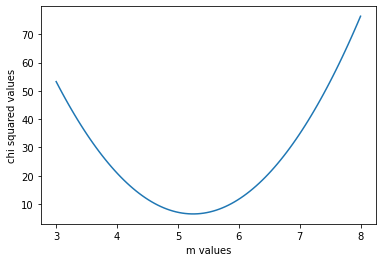

In [17]:
m_values = np.linspace(3,8,100)
chi_values = np.zeros(len(m_values))

for i in range(len(m_values)):
    chi_values[i] = chi_squared(m_values[i])
    
plt.figure()
plt.plot(m_values, chi_values)
plt.xlabel("m values")
plt.ylabel("chi squared values")
plt.show()

Now we can find the minimum.  If we called our array of $m$ ``m_values`` and our array of $\chi^2$ ``chi_values``, then:
- ``np.min(chi_values)`` will give you the minimum $\chi^2$ value, but it won't tell you what $m$ value makes it.
- ``np.argmin(chi_values)`` will tell you the index value that has the minimum.  It tells you which number has the minimum $\chi^2$.
- ``m_values[np.argmin(chi_values)]`` will then tell you the value of $m$ that minimizes $\chi^2$.  This is the best-fit slope.

Determine the minimum $\chi^2$ value and the value of $m$ that makes it.

In [20]:
print(np.min(chi_values))
print(np.argmin(chi_values))
m_values[np.argmin(chi_values)]

6.549439017953651
45


5.2727272727272725

You should've found that the minimum $\chi^2$ is 6.55 and this corresponds to $m = 5.27$.  This is the best fit slope.  However, as scientists we also want uncertainty on this slope.  The statistics related to $\chi^2$ tell us that the error bars should extend between the $m$ values that have $\chi^2 = 7.55$ (this is one plus the minimum $\chi^2$ value).  So, we need to find which $m$ values correspond to this new value.  We can do this with ``np.where()``.  
- First, use ``np.where(chi_values < 7.55)``.  This will tell you all the indices that have $\chi^2 < 7.55$.
- Take the smallest index, ``print(m_values[ ])``, where you put that smallest value in the ``[ ]``.
- Repeat with the largest index.

These two numbers represent the bottom and top of the error bar.  To find the uncertainty, find the difference of the two, and divide by two.  Report your uncertainty in the commented box below.

In [28]:
print(np.where(chi_values < 7.55))
print(m_values[39])
print(m_values[51])

(array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]),)
4.96969696969697
5.575757575757576


In [ ]:
# The best-fit slope is m = _5.27__ +/- _.30__

We can make this procedure more fit for computation.  Start with the following (**if you did not name your array ``chi_values`` you're going to need to rename it**)

In [29]:
indexes = np.where(chi_values < np.min(chi_values)+1)[0]
print(indexes)

[39 40 41 42 43 44 45 46 47 48 49 50 51]


Now, we can find the first and last index from the list:

In [30]:
print(indexes[0], indexes[-1])

39 51


Notice, we can count terms in an array as 0, 1, ...; we can also count backward -1, -2, ...; Use ``indexes[0]`` and ``indexes[-1]`` to write an expression to find the uncertainty using ``m_values``.

In [32]:
uncertainty = (m_values[indexes[-1]] - m_values[indexes[0]])/2

print(uncertainty)

0.3030303030303032


Finally, we want to create a plot with both the data and the best fit line.  We know how to make the errorbar plot, we did that near the beginning of this lab.  To add a line to the plot we should do the following:
- First create a function, ``f(x)``, that returns ``5.27 * x``, which is the best fit line.
- Next create a plot for x-values from -0.1 to 1, and using a loop to do the corresponding y-values, as always.
- immediately above your ``plt.errorbar`` command, include a ``plt.plot`` command, which will first create the best-fit line, then add the error-bar plot over it.

## Completing this lab in its entirety is Homework 7.  Please Submit by Monday, April 4

Before you submit, make sure that your code works with Kernel > Restart & Run All